In [246]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [247]:
anthem = pd.read_csv("anthems.csv")

In [248]:
anthem.head()

Country Alpha-2 Alpha-3 Continent  \
0     Albania      AL     ALB    Europe   
1     Armenia      AM     ARM    Europe   
2     Austria      AT     AUT    Europe   
3  Azerbaijan      AZ     AZE    Europe   
4     Belarus      BY     BLR    Europe   

                                              Anthem  
0  Around our flag we stand united, With one wish...  
1  Our Fatherland, free, independent, That has fo...  
2  Land of mountains, land by the river, Land of ...  
3  Azerbaijan, Azerbaijan! The glorious Fatherlan...  
4  We, Belarusians, are peaceful people, Wholehea...

In [249]:
anthem[anthem['Country'] == 'Nepal']['Anthem']

114    Woven from hundreds of flowers, we are one gar...
Name: Anthem, dtype: object

In [250]:
anthem = anthem.drop(columns=['Alpha-2','Alpha-3'])

In [251]:
anthem.head()

Country Continent                                             Anthem
0     Albania    Europe  Around our flag we stand united, With one wish...
1     Armenia    Europe  Our Fatherland, free, independent, That has fo...
2     Austria    Europe  Land of mountains, land by the river, Land of ...
3  Azerbaijan    Europe  Azerbaijan, Azerbaijan! The glorious Fatherlan...
4     Belarus    Europe  We, Belarusians, are peaceful people, Wholehea...

In [252]:
anthem['Anthem'] = anthem['Anthem'].str.lower().str.strip()

In [253]:
anthem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    190 non-null    object
 1   Continent  190 non-null    object
 2   Anthem     190 non-null    object
dtypes: object(3)
memory usage: 4.6+ KB


In [254]:
#Removing Stopwords and doing Lemmatization through nltk package
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
stop_words = stop_words.union({
    'shall', 'may', 'let', 'must', 'upon', 'thereof', 'therein', 'whereas',
    'unto', 'hence', 'thus', 'hereby', 'aforesaid', 'thee', 'thou', 'thy',
    'thine', 'theirs', 'your', 'yours', 'we', 'us', 'our', 'ours', 'they', 'them', 'their', 'their',
    'he', 'him', 'his', 'she', 'her', 'hers','many','oh','land','land','o','and','of','in','country',
    'for', 'to', 'with', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'that', 'which', 'who',
    'whom', 'this', 'these', 'those', 'it', 'its', 'such', 'as', 'at', 'by', 'on', 'an', 'the',
    'a', 'and', 'or', 'but', 'if', 'then', 'else', 'when', 'where', 'why', 'how', 'what', 'every','nation'
})

lemmatizer = WordNetLemmatizer()

def preprocess(text):
    # Lowercase
    text = text.lower()
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Remove punctuation and stopwords, then lemmatize
    clean_tokens = [
        lemmatizer.lemmatize(word) 
        for word in tokens 
        if word.isalpha() and word not in stop_words
    ]
    return " ".join(clean_tokens)


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ankitpokhrel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ankitpokhrel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ankitpokhrel/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [255]:
anthem['cleaned'] = anthem['Anthem'].apply(preprocess)

In [256]:
anthem

Country Continent  \
0           Albania    Europe   
1           Armenia    Europe   
2           Austria    Europe   
3        Azerbaijan    Europe   
4           Belarus    Europe   
..              ...       ...   
185         Tunisia    Africa   
186          Uganda    Africa   
187  Western Sahara    Africa   
188          Zambia    Africa   
189        Zimbabwe    Africa   

                                                Anthem  \
0    around our flag we stand united, with one wish...   
1    our fatherland, free, independent, that has fo...   
2    land of mountains, land by the river, land of ...   
3    azerbaijan, azerbaijan! the glorious fatherlan...   
4    we, belarusians, are peaceful people, wholehea...   
..                                                 ...   
185  o defenders of the homeland! rally around to t...   
186  oh uganda! may god uphold thee, we lay our fut...   
187  o sons of the sahara! in the battlefield, you ...   
188  stand and sing of zambia, proud and free, land...   
189  oh lift high the banner, the flag of zimbabwe ...   

                                               cleaned  
0    around flag stand united one wish one goal sac...  
1    fatherland free independent century lived summ...  
2    mountain river field cathedral hammer promisin...  
3    azerbaijan azerbaijan glorious fatherland valo...  
4    belarusian peaceful people wholeheartedly devo...  
..                                                 ...  
185  defender homeland rally around glory time bloo...  
186  uganda god uphold lay future hand united free ...  
187  son sahara battlefield torch holder long road ...  
188  stand sing zambia proud free work joy unity vi...  
189  lift high banner flag zimbabwe symbol freedom ...  

[190 rows x 4 columns]

In [257]:
#Convert TF-IDF matrix to DataFrame and append it
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Extract text
texts = anthem['cleaned'].tolist()

# Step 2: TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer.fit_transform(texts)

# Step 3: Convert to DataFrame
tfidf_df = pd.DataFrame(
    X_tfidf.toarray(),
    columns=vectorizer.get_feature_names_out()
)

# Step 4: Combine with original anthem DataFrame
anthem_tfidf = pd.concat([anthem.reset_index(drop=True), tfidf_df], axis=1)


In [258]:
anthem_tfidf.head()

Country Continent                                             Anthem  \
0     Albania    Europe  around our flag we stand united, with one wish...   
1     Armenia    Europe  our fatherland, free, independent, that has fo...   
2     Austria    Europe  land of mountains, land by the river, land of ...   
3  Azerbaijan    Europe  azerbaijan, azerbaijan! the glorious fatherlan...   
4     Belarus    Europe  we, belarusians, are peaceful people, wholehea...   

                                             cleaned  able  absolute  \
0  around flag stand united one wish one goal sac...   0.0       0.0   
1  fatherland free independent century lived summ...   0.0       0.0   
2  mountain river field cathedral hammer promisin...   0.0       0.0   
3  azerbaijan azerbaijan glorious fatherland valo...   0.0       0.0   
4  belarusian peaceful people wholeheartedly devo...   0.0       0.0   

   abundance  achieve  across  action  ...  yes  yesterday       yet  yoke  \
0        0.0      0.0     0.0     0.0  ...  0.0        0.0  0.132377   0.0   
1        0.0      0.0     0.0     0.0  ...  0.0        0.0  0.000000   0.0   
2        0.0      0.0     0.0     0.0  ...  0.0        0.0  0.000000   0.0   
3        0.0      0.0     0.0     0.0  ...  0.0        0.0  0.000000   0.0   
4        0.0      0.0     0.0     0.0  ...  0.0        0.0  0.000000   0.0   

      young  youth  zambia  zeal  zealand  zenith  
0  0.000000    0.0     0.0   0.0      0.0     0.0  
1  0.000000    0.0     0.0   0.0      0.0     0.0  
2  0.000000    0.0     0.0   0.0      0.0     0.0  
3  0.080376    0.0     0.0   0.0      0.0     0.0  
4  0.000000    0.0     0.0   0.0      0.0     0.0  

[5 rows x 1004 columns]

In [259]:
#PCA to create 3D data
from sklearn.decomposition import PCA

# Step 1: Select only TF-IDF columns (not original columns like 'Country' or 'Continent')
tfidf_features = anthem_tfidf.drop(columns=['Country', 'Continent', 'cleaned','Anthem'])  # drop other non-numeric columns if any

# Step 2: Apply PCA to reduce to 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(tfidf_features)

# Step 3: Create a DataFrame for the PCA features
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])

# Step 4: Append 'Country' and 'Continent' from original DataFrame
final_df = pd.concat([anthem[['Country', 'Continent']].reset_index(drop=True), pca_df], axis=1)


In [260]:
final_df

Country Continent       PC1       PC2       PC3
0           Albania    Europe -0.037446  0.119698 -0.191512
1           Armenia    Europe -0.062226  0.104469 -0.099019
2           Austria    Europe -0.020859 -0.023722 -0.005467
3        Azerbaijan    Europe -0.043510  0.007171 -0.047427
4           Belarus    Europe -0.040148  0.085910 -0.170096
..              ...       ...       ...       ...       ...
185         Tunisia    Africa -0.178908  0.008551 -0.153339
186          Uganda    Africa  0.104868 -0.042527  0.019596
187  Western Sahara    Africa  0.055781  0.165634 -0.027650
188          Zambia    Africa  0.178662  0.101501  0.005091
189        Zimbabwe    Africa  0.241799 -0.164460 -0.011978

[190 rows x 5 columns]

In [309]:
#Let's Plot data
fig = px.scatter_3d(
    final_df,
    x='PC1',
    y='PC2',
    z='PC3', 
    color='Continent',
    hover_name='Country',
    title='3D PCA Scatter Plot of National Anthems',
    opacity=0.7
)

fig.update_traces(marker=dict(size=5))  # Optional: control marker size
fig.show()


In [262]:
#PCA to create 2D data
from sklearn.decomposition import PCA

# Step 1: Select only TF-IDF columns (not original columns like 'Country' or 'Continent')
tfidf_features = anthem_tfidf.drop(columns=['Country', 'Continent', 'cleaned','Anthem'])  # drop other non-numeric columns if any

# Step 2: Apply PCA to reduce to 3 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(tfidf_features)

# Step 3: Create a DataFrame for the PCA features
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Step 4: Append 'Country' and 'Continent' from original DataFrame
final_2d_df = pd.concat([anthem[['Country', 'Continent']].reset_index(drop=True), pca_df], axis=1)


In [263]:
final_2d_df

Country Continent       PC1       PC2
0           Albania    Europe -0.043708  0.128609
1           Armenia    Europe -0.064271  0.107513
2           Austria    Europe -0.022464 -0.021613
3        Azerbaijan    Europe -0.048216  0.014939
4           Belarus    Europe -0.040629  0.092494
..              ...       ...       ...       ...
185         Tunisia    Africa -0.173830  0.014470
186          Uganda    Africa  0.101840 -0.045416
187  Western Sahara    Africa  0.055275  0.168650
188          Zambia    Africa  0.177898  0.096601
189        Zimbabwe    Africa  0.232552 -0.161149

[190 rows x 4 columns]

In [264]:
px.scatter(final_2d_df,x='PC1',y='PC2',color='Continent')

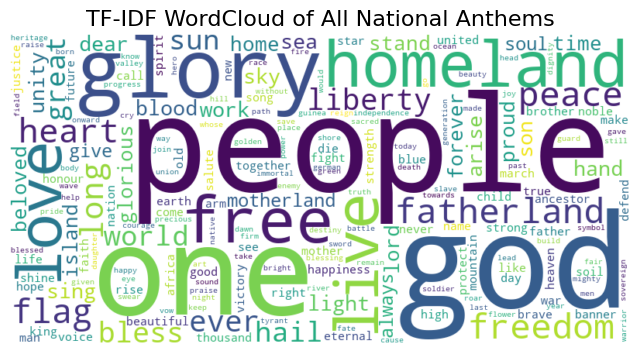

In [265]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sum TF-IDF scores for each word across all documents
tfidf_sums = tfidf_df.sum(axis=0)

# Convert to dictionary: {word: score}
tfidf_dict = tfidf_sums.to_dict()

# Generate the WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tfidf_dict)

# Plot it
plt.figure(figsize=(8,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('TF-IDF WordCloud of All National Anthems', fontsize=16)
plt.show()


In [266]:
anthem_tfidf

Country Continent  \
0           Albania    Europe   
1           Armenia    Europe   
2           Austria    Europe   
3        Azerbaijan    Europe   
4           Belarus    Europe   
..              ...       ...   
185         Tunisia    Africa   
186          Uganda    Africa   
187  Western Sahara    Africa   
188          Zambia    Africa   
189        Zimbabwe    Africa   

                                                Anthem  \
0    around our flag we stand united, with one wish...   
1    our fatherland, free, independent, that has fo...   
2    land of mountains, land by the river, land of ...   
3    azerbaijan, azerbaijan! the glorious fatherlan...   
4    we, belarusians, are peaceful people, wholehea...   
..                                                 ...   
185  o defenders of the homeland! rally around to t...   
186  oh uganda! may god uphold thee, we lay our fut...   
187  o sons of the sahara! in the battlefield, you ...   
188  stand and sing of zambia, proud and free, land...   
189  oh lift high the banner, the flag of zimbabwe ...   

                                               cleaned  able  absolute  \
0    around flag stand united one wish one goal sac...   0.0       0.0   
1    fatherland free independent century lived summ...   0.0       0.0   
2    mountain river field cathedral hammer promisin...   0.0       0.0   
3    azerbaijan azerbaijan glorious fatherland valo...   0.0       0.0   
4    belarusian peaceful people wholeheartedly devo...   0.0       0.0   
..                                                 ...   ...       ...   
185  defender homeland rally around glory time bloo...   0.0       0.0   
186  uganda god uphold lay future hand united free ...   0.0       0.0   
187  son sahara battlefield torch holder long road ...   0.0       0.0   
188  stand sing zambia proud free work joy unity vi...   0.0       0.0   
189  lift high banner flag zimbabwe symbol freedom ...   0.0       0.0   

     abundance   achieve  across  action  ...  yes  yesterday       yet  yoke  \
0          0.0  0.000000     0.0     0.0  ...  0.0        0.0  0.132377   0.0   
1          0.0  0.000000     0.0     0.0  ...  0.0        0.0  0.000000   0.0   
2          0.0  0.000000     0.0     0.0  ...  0.0        0.0  0.000000   0.0   
3          0.0  0.000000     0.0     0.0  ...  0.0        0.0  0.000000   0.0   
4          0.0  0.000000     0.0     0.0  ...  0.0        0.0  0.000000   0.0   
..         ...       ...     ...     ...  ...  ...        ...       ...   ...   
185        0.0  0.139551     0.0     0.0  ...  0.0        0.0  0.000000   0.0   
186        0.0  0.000000     0.0     0.0  ...  0.0        0.0  0.000000   0.0   
187        0.0  0.000000     0.0     0.0  ...  0.0        0.0  0.000000   0.0   
188        0.0  0.000000     0.0     0.0  ...  0.0        0.0  0.000000   0.0   
189        0.0  0.000000     0.0     0.0  ...  0.0        0.0  0.000000   0.0   

        young     youth    zambia  zeal  zealand  zenith  
0    0.000000  0.000000  0.000000   0.0      0.0     0.0  
1    0.000000  0.000000  0.000000   0.0      0.0     0.0  
2    0.000000  0.000000  0.000000   0.0      0.0     0.0  
3    0.080376  0.000000  0.000000   0.0      0.0     0.0  
4    0.000000  0.000000  0.000000   0.0      0.0     0.0  
..        ...       ...       ...   ...      ...     ...  
185  0.000000  0.133151  0.000000   0.0      0.0     0.0  
186  0.000000  0.000000  0.000000   0.0      0.0     0.0  
187  0.000000  0.000000  0.000000   0.0      0.0     0.0  
188  0.000000  0.000000  0.720169   0.0      0.0     0.0  
189  0.000000  0.000000  0.000000   0.0      0.0     0.0  

[190 rows x 1004 columns]

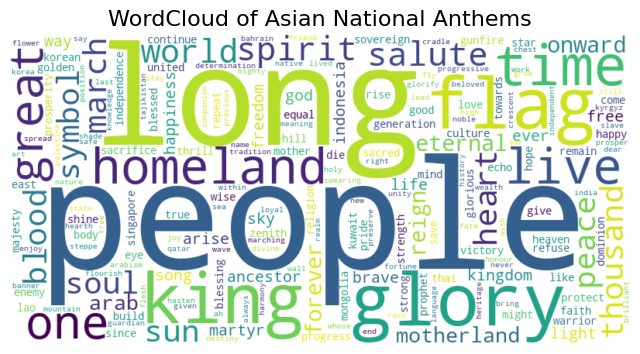

In [267]:
# Example: WordCloud for only Asian countries
asian_df = anthem_tfidf[anthem_tfidf['Continent'] == 'Asia']

# Drop metadata and sum TF-IDF values
asian_tfidf = asian_df.drop(columns=['Country', 'Continent', 'cleaned','Anthem']).sum(axis=0).to_dict()

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(asian_tfidf)

# Plot
plt.figure(figsize=(8,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Asian National Anthems', fontsize=16)
plt.show()


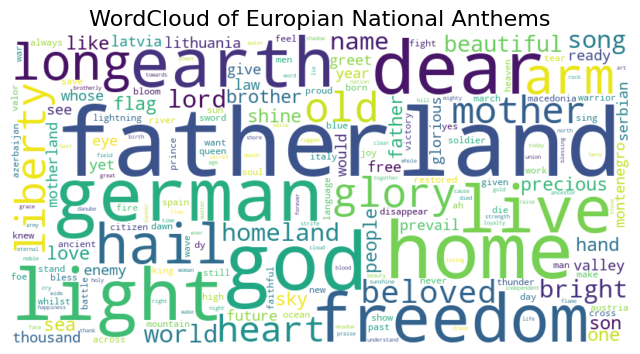

In [268]:
# Example: WordCloud for only Europe countries
europe_df = anthem_tfidf[anthem_tfidf['Continent'] == 'Europe']

# Drop metadata and sum TF-IDF values
europe_tfidf = europe_df.drop(columns=['Country', 'Continent', 'cleaned','Anthem']).sum(axis=0).to_dict()

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(europe_tfidf)

# Plot
plt.figure(figsize=(8,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Europian National Anthems', fontsize=16)
plt.show()


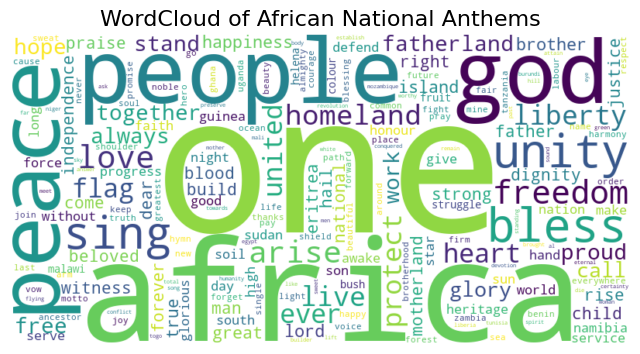

In [269]:
# Example: WordCloud for only African countries
africa_df = anthem_tfidf[anthem_tfidf['Continent'] == 'Africa']

# Drop metadata and sum TF-IDF values
africa_tfidf = africa_df.drop(columns=['Country', 'Continent', 'cleaned','Anthem']).sum(axis=0).to_dict()

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(africa_tfidf)

# Plot
plt.figure(figsize=(8,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of African National Anthems', fontsize=16)
plt.show()


In [270]:
anthem_tfidf['Continent'].unique()

array(['Europe', 'South_', 'South_America', 'North_America', 'Oceania',
       'Asia', 'Africa'], dtype=object)

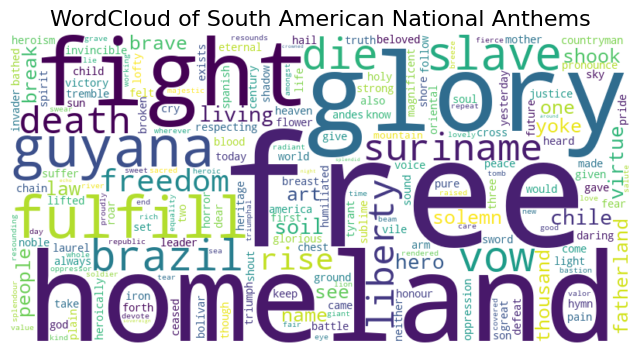

In [271]:
# Example: WordCloud for only South_America countries
s_america_df = anthem_tfidf[anthem_tfidf['Continent'] == 'South_America']

# Drop metadata and sum TF-IDF values
s_america_tfidf = s_america_df.drop(columns=['Country', 'Continent', 'cleaned','Anthem']).sum(axis=0).to_dict()

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(s_america_tfidf)

# Plot
plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of South American National Anthems', fontsize=16)
plt.show()


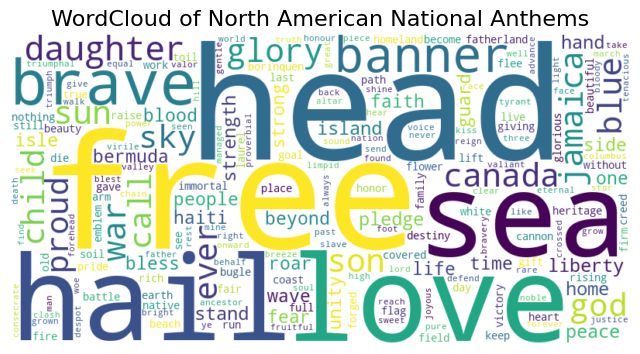

In [272]:
# Example: WordCloud for only North_America countries
n_america_df = anthem_tfidf[anthem_tfidf['Continent'] == 'North_America']

# Drop metadata and sum TF-IDF values
n_america_tfidf = n_america_df.drop(columns=['Country', 'Continent', 'cleaned','Anthem']).sum(axis=0).to_dict()

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(n_america_tfidf)

# Plot
plt.figure(figsize=(8,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of North American National Anthems', fontsize=16)
plt.show()


In [381]:
# Example: WordCloud for only Oceania countries
oceania_df = anthem_tfidf[anthem_tfidf['Continent'] == 'Oceania']

# Drop metadata and sum TF-IDF values
oceania_tfidf = oceania_df.drop(columns=['Country', 'Continent', 'cleaned','Anthem']).sum(axis=0).to_dict()

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(oceania_tfidf)

# Plot
plt.figure(figsize=(8,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Oceania National Anthems', fontsize=16)
plt.show()


TypeError: '<' not supported between instances of 'float' and 'str'

In [274]:
anthem_tfidf
final_df
final_2d_df

Country Continent       PC1       PC2
0           Albania    Europe -0.043708  0.128609
1           Armenia    Europe -0.064271  0.107513
2           Austria    Europe -0.022464 -0.021613
3        Azerbaijan    Europe -0.048216  0.014939
4           Belarus    Europe -0.040629  0.092494
..              ...       ...       ...       ...
185         Tunisia    Africa -0.173830  0.014470
186          Uganda    Africa  0.101840 -0.045416
187  Western Sahara    Africa  0.055275  0.168650
188          Zambia    Africa  0.177898  0.096601
189        Zimbabwe    Africa  0.232552 -0.161149

[190 rows x 4 columns]

In [275]:
# #Write me small beautifulsoup code to scrape data from https://wisevoter.com/country-rankings/religion-by-country/#google_vignette site and save it to .html file 
# import requests
# from bs4 import BeautifulSoup
# url = "https://wisevoter.com/country-rankings/religion-by-country/#google_vignette"
# response = requests.get(url)
# soup = BeautifulSoup(response.content, 'html.parser')
# with open("religion_by_country.html", "w", encoding='utf-8') as file:
#     file.write(str(soup.prettify()))


In [276]:
# import pandas as pd
# from bs4 import BeautifulSoup
# with open("religion_by_country.html", "r", encoding='utf-8') as file:
#     soup = BeautifulSoup(file, 'html.parser')
# rows = soup.find_all('tr')
# data = []
# for row in rows:
#     cols = row.find_all(['td', 'th'])
#     cols = [ele.text.strip() for ele in cols]
#     data.append([ele for ele in cols if ele])  # Get rid of empty values
# df = pd.DataFrame(data[1:], columns=data[0])  # Create a Data
# df.to_csv('religion_by_country.csv', index=False, encoding='utf-8-sig')  # Save to CSV
# print("CSV file 'religion_by_country.csv' created successfully.")
# # Read the CSV file and print the first few rows


In [277]:
df = pd.read_csv('religion_by_country.csv')
print(df.head())

    Country Majority Religion Majority Religion Population
0    Bhutan          Buddhism                      540,000
1  Cambodia          Buddhism                   13,690,000
2     Japan          Buddhism                   45,820,000
3      Laos          Buddhism                    4,100,000
4     Macau          Buddhism                       90,000


In [278]:
#drop Majority Religion Population
df = df.drop(columns=['Majority Religion Population'])

In [279]:
df['Country'] = df['Country'].str.strip().str.lower()

In [280]:
df

Country Majority Religion
0            bhutan          Buddhism
1          cambodia          Buddhism
2             japan          Buddhism
3              laos          Buddhism
4             macau          Buddhism
..              ...               ...
209      uzbekistan             Islam
210  western sahara             Islam
211           yemen             Islam
212          israel           Judaism
213     north korea             Other

[214 rows x 2 columns]

In [281]:
anthem_tfidf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Columns: 1004 entries, Country to zenith
dtypes: float64(1000), object(4)
memory usage: 1.5+ MB


In [282]:
anthem_tfidf['Country'] = anthem_tfidf['Country'].str.strip().str.lower()
final_df['Country'] = final_df['Country'].str.strip().str.lower()
final_2d_df['Country'] = final_2d_df['Country'].str.strip().str.lower()

In [283]:
final_2d_df.head()

Country Continent       PC1       PC2
0     albania    Europe -0.043708  0.128609
1     armenia    Europe -0.064271  0.107513
2     austria    Europe -0.022464 -0.021613
3  azerbaijan    Europe -0.048216  0.014939
4     belarus    Europe -0.040629  0.092494

In [284]:
df.head()

Country Majority Religion
0    bhutan          Buddhism
1  cambodia          Buddhism
2     japan          Buddhism
3      laos          Buddhism
4     macau          Buddhism

In [285]:
final_df.head()

Country Continent       PC1       PC2       PC3
0     albania    Europe -0.037446  0.119698 -0.191512
1     armenia    Europe -0.062226  0.104469 -0.099019
2     austria    Europe -0.020859 -0.023722 -0.005467
3  azerbaijan    Europe -0.043510  0.007171 -0.047427
4     belarus    Europe -0.040148  0.085910 -0.170096

In [286]:
anthem_tfidf = anthem_tfidf.merge(df, on='Country')


In [287]:
anthem_tfidf.head(2)

Country Continent                                             Anthem  \
0  albania    Europe  around our flag we stand united, with one wish...   
1  armenia    Europe  our fatherland, free, independent, that has fo...   

                                             cleaned  able  absolute  \
0  around flag stand united one wish one goal sac...   0.0       0.0   
1  fatherland free independent century lived summ...   0.0       0.0   

   abundance  achieve  across  action  ...  yesterday       yet  yoke  young  \
0        0.0      0.0     0.0     0.0  ...        0.0  0.132377   0.0    0.0   
1        0.0      0.0     0.0     0.0  ...        0.0  0.000000   0.0    0.0   

   youth  zambia  zeal  zealand  zenith  Majority Religion  
0    0.0     0.0   0.0      0.0     0.0              Islam  
1    0.0     0.0   0.0      0.0     0.0       Christianity  

[2 rows x 1005 columns]

In [288]:
final_df = final_df.merge(df, on='Country')
final_2d_df = final_2d_df.merge(df, on='Country')

In [289]:
final_df.shape

(179, 6)

In [290]:
final_2d_df

Country Continent       PC1       PC2 Majority Religion
0           albania    Europe -0.043708  0.128609             Islam
1           armenia    Europe -0.064271  0.107513      Christianity
2           austria    Europe -0.022464 -0.021613      Christianity
3        azerbaijan    Europe -0.048216  0.014939             Islam
4           belarus    Europe -0.040629  0.092494      Christianity
..              ...       ...       ...       ...               ...
174         tunisia    Africa -0.173830  0.014470             Islam
175          uganda    Africa  0.101840 -0.045416      Christianity
176  western sahara    Africa  0.055275  0.168650             Islam
177          zambia    Africa  0.177898  0.096601      Christianity
178        zimbabwe    Africa  0.232552 -0.161149      Christianity

[179 rows x 5 columns]

In [291]:
anthem_tfidf['Majority Religion'].value_counts()

Majority Religion
Christianity    115
Islam            47
Buddhism         12
Hinduism          3
Judaism           1
Other             1
Name: count, dtype: int64

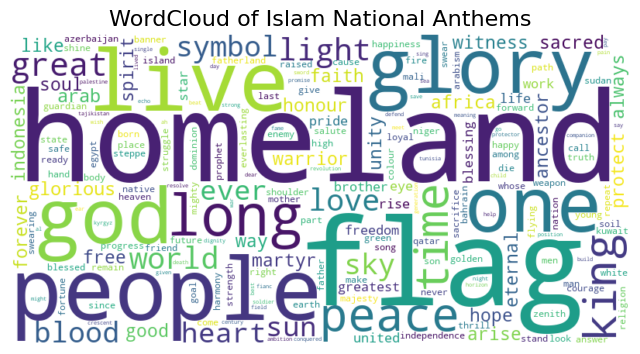

In [292]:
# Example: WordCloud for only Islam countries
islam_df = anthem_tfidf[anthem_tfidf['Majority Religion'] == 'Islam']

# Drop metadata and sum TF-IDF values
islam_tfidf = islam_df.drop(columns=['Country', 'Continent', 'cleaned','Anthem','Majority Religion']).sum(axis=0).to_dict()

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(islam_tfidf)

# Plot
plt.figure(figsize=(8,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Islam National Anthems', fontsize=16)
plt.show()


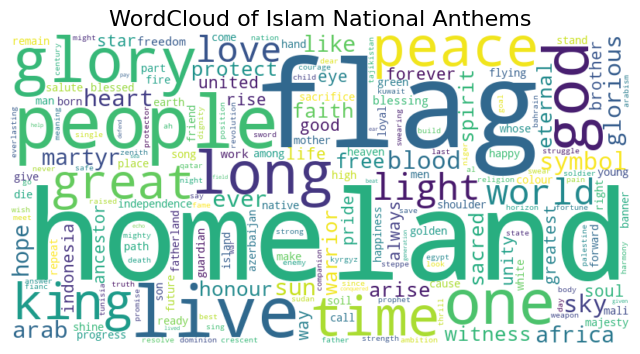

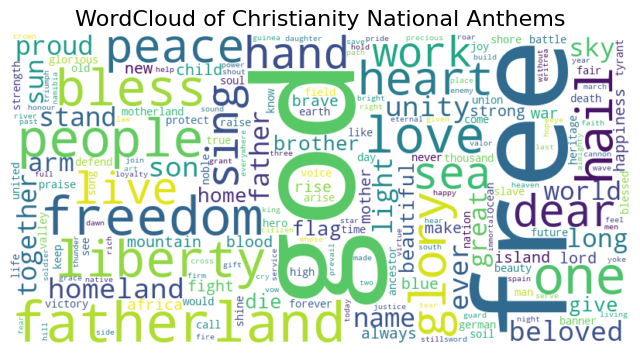

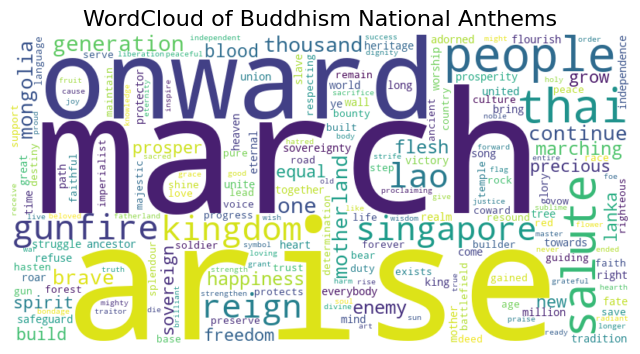

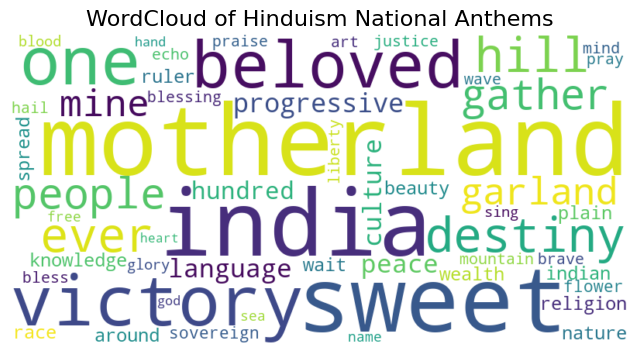

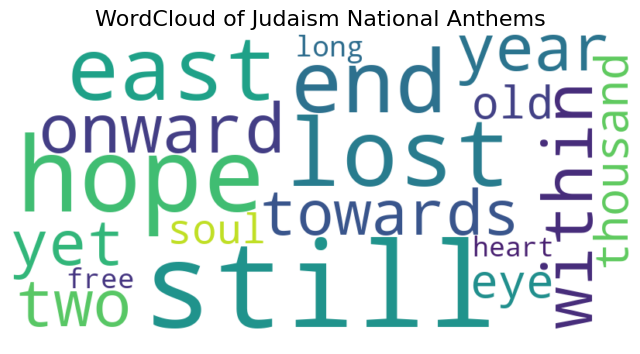

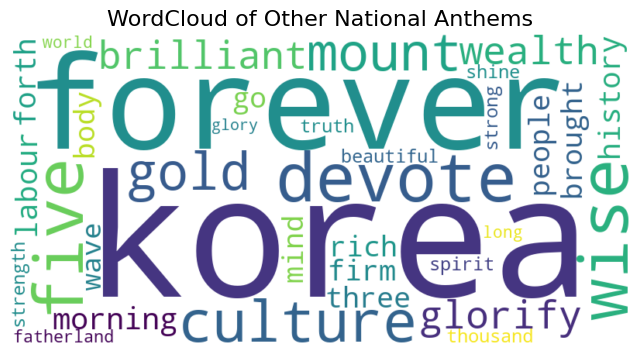

In [293]:
# Generate WordClouds for each religion in 'Majority Religion'
religions = anthem_tfidf['Majority Religion'].unique()
for religion in religions:
    rel_df = anthem_tfidf[anthem_tfidf['Majority Religion'] == religion]
    rel_tfidf = rel_df.drop(columns=['Country', 'Continent', 'cleaned', 'Anthem', 'Majority Religion']).sum(axis=0).to_dict()
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(rel_tfidf)
    plt.figure(figsize=(8,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud of {religion} National Anthems', fontsize=16)
    plt.show()

In [294]:
#import countries_conflict_status.csv
conflict_status = pd.read_csv("countries_conflict_status.csv")
conflict_status.head()

country     war
0  afghanistan    mild
1      albania    mild
2      algeria    mild
3      andorra  no_war
4       angola    mild

In [295]:
conflict_status['Country'] = conflict_status['country'].str.strip().str.lower()

In [296]:
conflict_status.count()

country    193
war        193
Country    193
dtype: int64

In [297]:
#drop 'country' column
conflict_status = conflict_status.drop(columns=['country'])

In [298]:
conflict_status.isnull().sum()

war        0
Country    0
dtype: int64

In [299]:
print(anthem_tfidf.columns)
print(conflict_status.columns)


Index(['Country', 'Continent', 'Anthem', 'cleaned', 'able', 'absolute',
       'abundance', 'achieve', 'across', 'action',
       ...
       'yesterday', 'yet', 'yoke', 'young', 'youth', 'zambia', 'zeal',
       'zealand', 'zenith', 'Majority Religion'],
      dtype='object', length=1005)
Index(['war', 'Country'], dtype='object')


In [300]:
conflict_status.drop_duplicates(subset=['Country'], inplace=True)

In [301]:
conflict_status.shape

(193, 2)

In [302]:
anthem_tfidf = anthem_tfidf.merge(conflict_status, on='Country')
final_df = final_df.merge(conflict_status, on='Country')
final_2d_df = final_2d_df.merge(conflict_status, on='Country')

In [303]:
anthem_tfidf['war_y'].value_counts()

war_y
mild      144
no_war     17
heavy       8
Name: count, dtype: int64

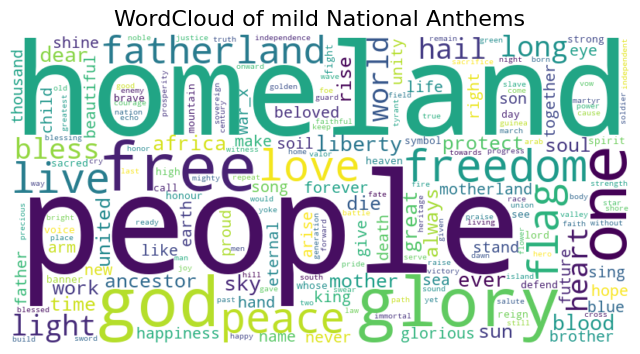

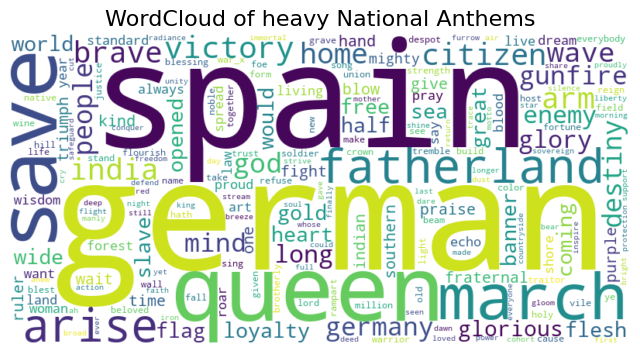

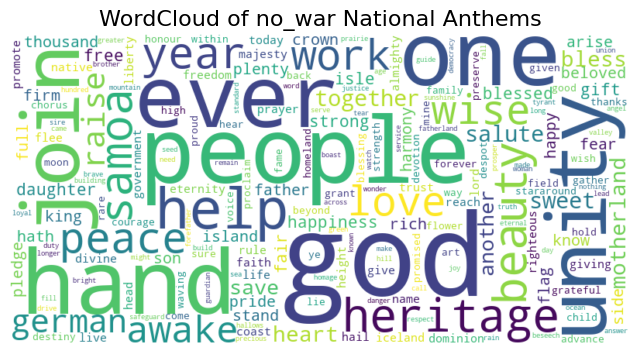

In [304]:
# Generate WordClouds for each religion in 'Majority Religion'
war_status = anthem_tfidf['war_y'].unique()
for war in war_status:
    war_df = anthem_tfidf[anthem_tfidf['war_y'] == war]
    war_tfidf = war_df.drop(columns=['Country', 'Continent', 'cleaned', 'Anthem', 'Majority Religion','war_y']).sum(axis=0).to_dict()
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(war_tfidf)
    plt.figure(figsize=(8,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud of {war} National Anthems', fontsize=16)
    plt.show()

In [305]:
war_status = anthem_tfidf['war_y'].unique()
war_status

array(['mild', 'heavy', 'no_war'], dtype=object)

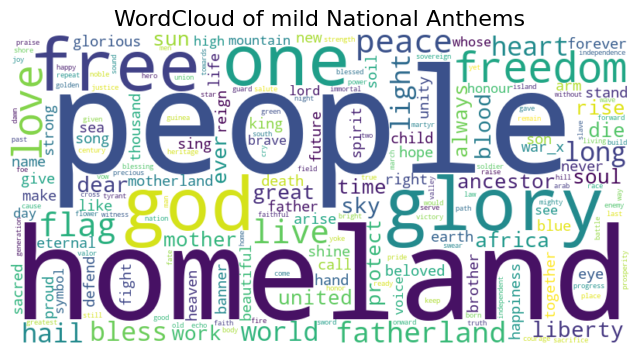

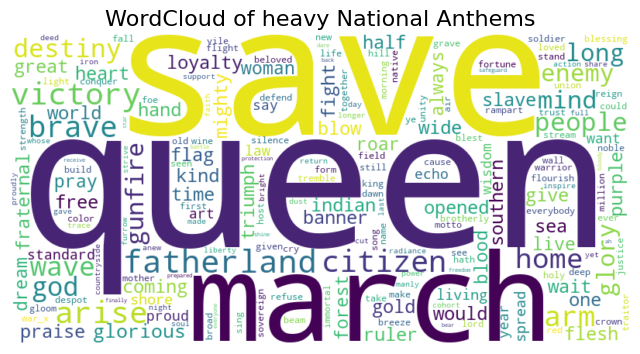

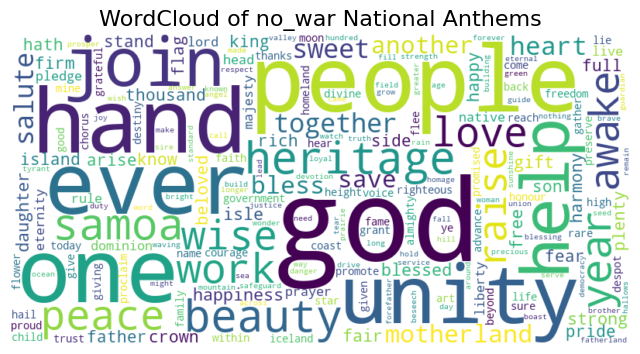

In [306]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

excluded_words = ['germany', 'america', 'india', 'land','german','spain']  # Add more as needed
war_status = anthem_tfidf['war_y'].unique()

for war in war_status:
    war_df = anthem_tfidf[anthem_tfidf['war_y'] == war]
    war_tfidf = war_df.drop(columns=['Country', 'Continent', 'cleaned', 'Anthem', 'Majority Religion', 'war_y']).sum(axis=0).to_dict()
    
    # Remove excluded words
    for word in excluded_words:
        war_tfidf.pop(word, None)
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(war_tfidf)
    
    plt.figure(figsize=(8, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud of {war} National Anthems', fontsize=16)
    plt.show()


In [307]:
anthem_tfidf.head()

Country Continent                                             Anthem  \
0     albania    Europe  around our flag we stand united, with one wish...   
1     armenia    Europe  our fatherland, free, independent, that has fo...   
2     austria    Europe  land of mountains, land by the river, land of ...   
3  azerbaijan    Europe  azerbaijan, azerbaijan! the glorious fatherlan...   
4     belarus    Europe  we, belarusians, are peaceful people, wholehea...   

                                             cleaned  able  absolute  \
0  around flag stand united one wish one goal sac...   0.0       0.0   
1  fatherland free independent century lived summ...   0.0       0.0   
2  mountain river field cathedral hammer promisin...   0.0       0.0   
3  azerbaijan azerbaijan glorious fatherland valo...   0.0       0.0   
4  belarusian peaceful people wholeheartedly devo...   0.0       0.0   

   abundance  achieve  across  action  ...       yet  yoke     young  youth  \
0        0.0      0.0     0.0     0.0  ...  0.132377   0.0  0.000000    0.0   
1        0.0      0.0     0.0     0.0  ...  0.000000   0.0  0.000000    0.0   
2        0.0      0.0     0.0     0.0  ...  0.000000   0.0  0.000000    0.0   
3        0.0      0.0     0.0     0.0  ...  0.000000   0.0  0.080376    0.0   
4        0.0      0.0     0.0     0.0  ...  0.000000   0.0  0.000000    0.0   

   zambia  zeal  zealand  zenith  Majority Religion  war_y  
0     0.0   0.0      0.0     0.0              Islam   mild  
1     0.0   0.0      0.0     0.0       Christianity   mild  
2     0.0   0.0      0.0     0.0       Christianity   mild  
3     0.0   0.0      0.0     0.0              Islam   mild  
4     0.0   0.0      0.0     0.0       Christianity   mild  

[5 rows x 1006 columns]

In [308]:
final_df[final_df['Country'].str.contains('russia')]

Country Continent       PC1      PC2       PC3 Majority Religion    war
31  russia    Europe -0.010213  0.05122 -0.122397      Christianity  heavy

In [310]:
#Let's Plot data
fig = px.scatter_3d(
    final_df,
    x='PC1',
    y='PC2',
    z='PC3', 
    color='Majority Religion',
    hover_name='Country',
    title='3D PCA Scatter Plot of National Anthems',
    opacity=0.7
)

fig.update_traces(marker=dict(size=5))  # Optional: control marker size
fig.show()


In [313]:
#Let's Plot data
fig = px.scatter_3d(
    final_df,
    x='PC1',
    y='PC2',
    z='PC3', 
    color='war',
    hover_name='Country',
    title='3D PCA Scatter Plot of National Anthems',
    opacity=0.7
)

fig.update_traces(marker=dict(size=5))  # Optional: control marker size
fig.show()


In [314]:
px.scatter(final_2d_df,x='PC1',y='PC2',color='Continent')

In [315]:
px.scatter(final_2d_df,x='PC1',y='PC2',color='war')

In [317]:
px.scatter(final_2d_df,x='PC1',y='PC2',color='Majority Religion')

In [332]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import string
import numpy as np

# 1. Extract the features
X = final_2d_df[['PC1', 'PC2']]

# 2. Find the optimal number of clusters using silhouette score
silhouette_scores = []
range_n_clusters = range(2, 10)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# 3. Choose the number of clusters with the highest silhouette score
best_n = 4  # You can change this based on the silhouette_scores list

# 4. Apply KMeans with the best number of clusters
kmeans = KMeans(n_clusters=best_n, random_state=42, n_init='auto')
final_2d_df['Cluster'] = kmeans.fit_predict(X)

# 5. Map numeric clusters to alphabetical labels
labels = list(string.ascii_uppercase)  # ['A', 'B', 'C', ...]
cluster_map = {i: f"{labels[i]} cluster" for i in range(best_n)}
final_2d_df['Cluster'] = final_2d_df['Cluster'].map(cluster_map)

# Optional: Check result
print(final_2d_df.head())


      Country Continent       PC1       PC2 Majority Religion   war    Cluster
0     albania    Europe -0.043708  0.128609             Islam  mild  D cluster
1     armenia    Europe -0.064271  0.107513      Christianity  mild  D cluster
2     austria    Europe -0.022464 -0.021613      Christianity  mild  C cluster
3  azerbaijan    Europe -0.048216  0.014939             Islam  mild  C cluster
4     belarus    Europe -0.040629  0.092494      Christianity  mild  C cluster


In [333]:
final_2d_df['Cluster'].value_counts()

Cluster
C cluster    63
A cluster    44
B cluster    42
D cluster    20
Name: count, dtype: int64

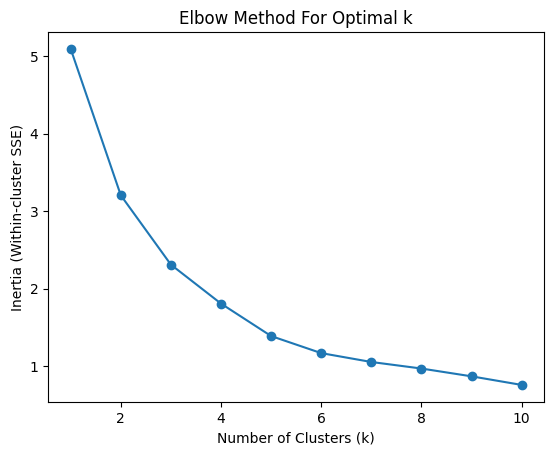

In [334]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(k_range, inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster SSE)')
plt.title('Elbow Method For Optimal k')
plt.show()


In [335]:
px.scatter(final_2d_df,x='PC1',y='PC2',color='Cluster', hover_name='Country',
           title='2D PCA Scatter Plot of National Anthems with Clusters',
           )

In [338]:
final_2d_df[final_2d_df['Cluster'] == 'C cluster']['Majority Religion'].value_counts()

Majority Religion
Christianity    37
Islam           16
Buddhism         8
Hinduism         2
Name: count, dtype: int64

In [339]:
final_2d_df[final_2d_df['Cluster'] == 'A cluster']['Majority Religion'].value_counts()

Majority Religion
Christianity    29
Islam           14
Judaism          1
Name: count, dtype: int64

In [340]:
final_2d_df[final_2d_df['Cluster'] == 'B cluster']['Majority Religion'].value_counts()

Majority Religion
Christianity    33
Islam            7
Buddhism         1
Hinduism         1
Name: count, dtype: int64

In [342]:
final_2d_df[final_2d_df['Cluster'] == 'D cluster']['Majority Religion'].value_counts()

Majority Religion
Christianity    10
Islam            8
Buddhism         2
Name: count, dtype: int64

In [343]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import string
import numpy as np

# Step 1: Feature selection
X = final_df[['PC1', 'PC2', 'PC3']]

# Step 2: Determine optimal number of clusters
silhouette_scores = []
range_n_clusters = range(2, 10)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(X)
    score = silhouette_score(X, cluster_labels)
    silhouette_scores.append(score)

best_k = range_n_clusters[np.argmax(silhouette_scores)]

# Step 3: Fit KMeans with best cluster count
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init='auto')
final_df['Cluster'] = kmeans.fit_predict(X)

# Step 4: Map numeric cluster to alphabetical label
cluster_map = {i: f"{string.ascii_uppercase[i]} cluster" for i in range(best_k)}
final_df['Cluster'] = final_df['Cluster'].map(cluster_map)

print(f"Optimal number of clusters: {best_k}")
print(final_df[['Country', 'Cluster']].head())


Optimal number of clusters: 4
      Country    Cluster
0     albania  A cluster
1     armenia  A cluster
2     austria  A cluster
3  azerbaijan  A cluster
4     belarus  A cluster


In [344]:
#Let's Plot data
fig = px.scatter_3d(
    final_df,
    x='PC1',
    y='PC2',
    z='PC3', 
    color='Cluster',
    hover_name='Country',
    title='3D PCA Scatter Plot of National Anthems',
    opacity=0.7
)

fig.update_traces(marker=dict(size=5))  # Optional: control marker size
fig.show()


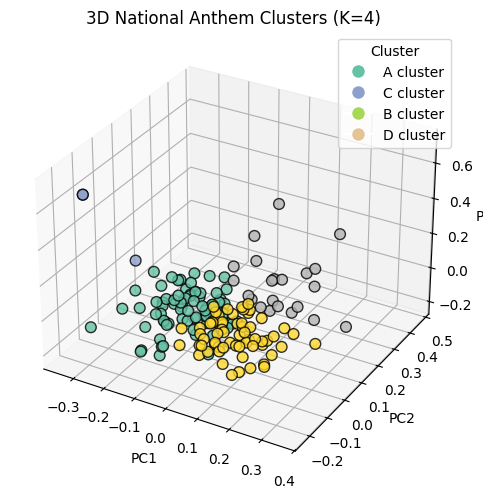

In [351]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')

# Convert cluster labels to numeric for color mapping
color_map = {label: idx for idx, label in enumerate(final_df['Cluster'].unique())}
colors = final_df['Cluster'].map(color_map)

scatter = ax.scatter(
    final_df['PC1'], final_df['PC2'], final_df['PC3'],
    c=colors, cmap='Set2', s=60, edgecolor='k', alpha=0.8
)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title(f'3D National Anthem Clusters (K={best_k})')

# Custom legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w',
                    label=label, markerfacecolor=plt.cm.Set2(idx / best_k), markersize=10)
                   for label, idx in color_map.items()]
ax.legend(handles=legend_elements, title='Cluster')

plt.tight_layout()
plt.show()


In [347]:
pd.crosstab(index=final_df['Cluster'], columns=final_df['Majority Religion']).fillna(0)

Majority Religion  Buddhism  Christianity  Hinduism  Islam  Judaism
Cluster                                                            
A cluster                 4            49         0     27        1
B cluster                 4            45         3     11        0
C cluster                 0             3         0      0        0
D cluster                 3            12         0      7        0

In [348]:
pd.crosstab(index=final_df['Cluster'], columns=final_df['war']).fillna(0)

war        heavy  mild  no_war
Cluster                       
A cluster      4    74       3
B cluster      3    48      12
C cluster      0     3       0
D cluster      1    19       2

In [ ]:
pd.crosstab(index=final_df['Cluster'], columns=final_df['war']).fillna(0)

In [350]:
pd.crosstab(index=final_df['Majority Religion'], columns=final_df['war']).fillna(0)

war                heavy  mild  no_war
Majority Religion                     
Buddhism               1    10       0
Christianity           6    89      14
Hinduism               1     1       1
Islam                  0    43       2
Judaism                0     1       0

In [353]:
anthem['War'] = anthem_tfidf['war_y']
anthem['Religion'] = anthem_tfidf['Majority Religion']

In [355]:
anthem.head(10)

Country Continent  \
0                 Albania    Europe   
1                 Armenia    Europe   
2                 Austria    Europe   
3              Azerbaijan    Europe   
4                 Belarus    Europe   
5                 Belgium    Europe   
6  Bosnia and Herzegovina    Europe   
7                Bulgaria    Europe   
8                 Croatia    Europe   
9                  Cyprus    Europe   

                                              Anthem  \
0  around our flag we stand united, with one wish...   
1  our fatherland, free, independent, that has fo...   
2  land of mountains, land by the river, land of ...   
3  azerbaijan, azerbaijan! the glorious fatherlan...   
4  we, belarusians, are peaceful people, wholehea...   
5  o dear belgium, o holy land of the fathers ã¢â...   
6  you're the light of the soul eternal fire's fl...   
7  proud balkan mountains, next to it the danube ...   
8  our beautiful homeland, oh so fearless and gra...   
9  we knew thee of old, o, divinely restored, by ...   

                                             cleaned   War      Religion  
0  around flag stand united one wish one goal sac...  mild         Islam  
1  fatherland free independent century lived summ...  mild  Christianity  
2  mountain river field cathedral hammer promisin...  mild  Christianity  
3  azerbaijan azerbaijan glorious fatherland valo...  mild         Islam  
4  belarusian peaceful people wholeheartedly devo...  mild  Christianity  
5  dear belgium holy father soul heart devoted bl...  mild  Christianity  
6  light soul eternal fire flame mother bosnia be...  mild  Christianity  
7  proud balkan mountain next danube sparkle sun ...  mild  Christianity  
8  beautiful homeland fearless gracious father an...  mild  Christianity  
9  knew old divinely restored light eye light swo...  mild  Christianity

In [369]:
final_df.columns

Index(['Country', 'Continent', 'PC1', 'PC2', 'PC3', 'Majority Religion', 'war',
       'Cluster'],
      dtype='object')

In [375]:
#Let's Plot data
fig = px.scatter_3d(
    final_df,
    x='PC1',
    y='PC2',
    z='PC3', 
    color='Continent',
    hover_name='Country',
    title='3D PCA Scatter Plot of National Anthems',
    opacity=0.7
)

fig.update_traces(marker=dict(size=5))  # Optional: control marker size
fig.show()


In [371]:
#Let's Plot data
fig = px.scatter_3d(
    final_df,
    x='PC1',
    y='PC2',
    z='PC3', 
    color='Majority Religion',
    hover_name='Country',
    title='3D PCA Scatter Plot of National Anthems',
    opacity=0.7
)

fig.update_traces(marker=dict(size=5))  # Optional: control marker size
fig.show()


In [374]:
#Let's Plot data
fig = px.scatter_3d(
    final_df,
    x='PC1',
    y='PC2',
    z='PC3', 
    color='war',
    hover_name='Country',
    title='3D PCA Scatter Plot of National Anthems',
    opacity=0.7
)

fig.update_traces(marker=dict(size=5))  # Optional: control marker size
fig.show()


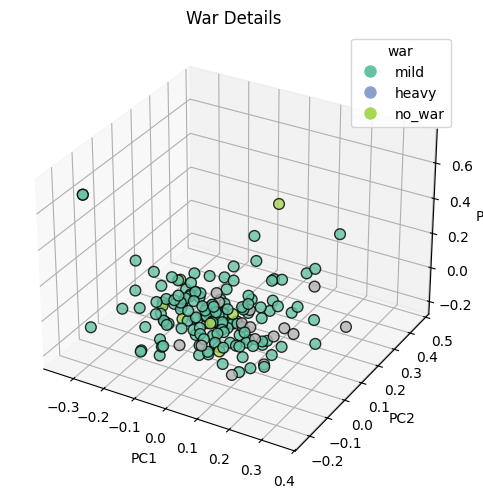

In [377]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')

# Convert cluster labels to numeric for color mapping
color_map = {label: idx for idx, label in enumerate(final_df['war'].unique())}
colors = final_df['war'].map(color_map)

scatter = ax.scatter(
    final_df['PC1'], final_df['PC2'], final_df['PC3'],
    c=colors, cmap='Set2', s=60, edgecolor='k', alpha=0.8
)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title(f'War Details')

# Custom legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w',
                    label=label, markerfacecolor=plt.cm.Set2(idx / best_k), markersize=10)
                   for label, idx in color_map.items()]
ax.legend(handles=legend_elements, title='war')

plt.tight_layout()
plt.show()


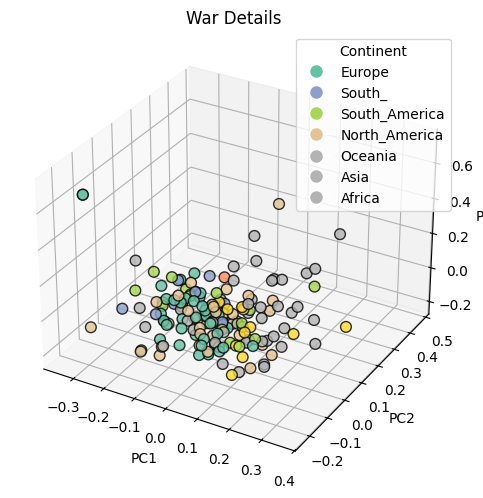

In [378]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')

# Convert cluster labels to numeric for color mapping
color_map = {label: idx for idx, label in enumerate(final_df['Continent'].unique())}
colors = final_df['Continent'].map(color_map)

scatter = ax.scatter(
    final_df['PC1'], final_df['PC2'], final_df['PC3'],
    c=colors, cmap='Set2', s=60, edgecolor='k', alpha=0.8
)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title(f'War Details')

# Custom legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w',
                    label=label, markerfacecolor=plt.cm.Set2(idx / best_k), markersize=10)
                   for label, idx in color_map.items()]
ax.legend(handles=legend_elements, title='Continent')

plt.tight_layout()
plt.show()


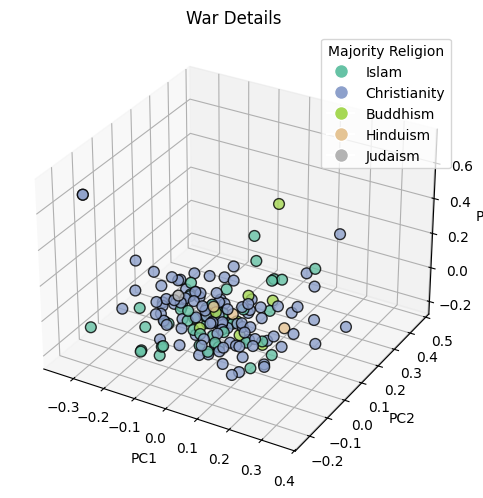

In [379]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')

# Convert cluster labels to numeric for color mapping
color_map = {label: idx for idx, label in enumerate(final_df['Majority Religion'].unique())}
colors = final_df['Majority Religion'].map(color_map)

scatter = ax.scatter(
    final_df['PC1'], final_df['PC2'], final_df['PC3'],
    c=colors, cmap='Set2', s=60, edgecolor='k', alpha=0.8
)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title(f'War Details')

# Custom legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w',
                    label=label, markerfacecolor=plt.cm.Set2(idx / best_k), markersize=10)
                   for label, idx in color_map.items()]
ax.legend(handles=legend_elements, title='Majority Religion')

plt.tight_layout()
plt.show()


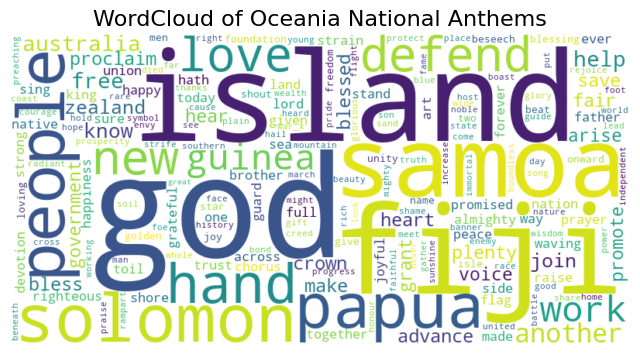

In [384]:
# Example: WordCloud for only Oceania countries
oceania_df = anthem_tfidf[anthem_tfidf['Continent'] == 'Oceania']

# Drop metadata and sum TF-IDF values
oceania_tfidf = oceania_df.drop(columns=['Country', 'Continent', 'cleaned','Anthem','Majority Religion',	'war_y']).sum(axis=0).to_dict()

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(oceania_tfidf)

# Plot
plt.figure(figsize=(8,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Oceania National Anthems', fontsize=16)
plt.show()


In [383]:
anthem_tfidf

Country Continent                                             Anthem  \
0       albania    Europe  around our flag we stand united, with one wish...   
1       armenia    Europe  our fatherland, free, independent, that has fo...   
2       austria    Europe  land of mountains, land by the river, land of ...   
3    azerbaijan    Europe  azerbaijan, azerbaijan! the glorious fatherlan...   
4       belarus    Europe  we, belarusians, are peaceful people, wholehea...   
..          ...       ...                                                ...   
164        togo    Africa  hail to thee, land of our forefathers' thou wh...   
165     tunisia    Africa  o defenders of the homeland! rally around to t...   
166      uganda    Africa  oh uganda! may god uphold thee, we lay our fut...   
167      zambia    Africa  stand and sing of zambia, proud and free, land...   
168    zimbabwe    Africa  oh lift high the banner, the flag of zimbabwe ...   

                                               cleaned  able  absolute  \
0    around flag stand united one wish one goal sac...   0.0       0.0   
1    fatherland free independent century lived summ...   0.0       0.0   
2    mountain river field cathedral hammer promisin...   0.0       0.0   
3    azerbaijan azerbaijan glorious fatherland valo...   0.0       0.0   
4    belarusian peaceful people wholeheartedly devo...   0.0       0.0   
..                                                 ...   ...       ...   
164  hail forefather made strong peaceful happy cul...   0.0       0.0   
165  defender homeland rally around glory time bloo...   0.0       0.0   
166  uganda god uphold lay future hand united free ...   0.0       0.0   
167  stand sing zambia proud free work joy unity vi...   0.0       0.0   
168  lift high banner flag zimbabwe symbol freedom ...   0.0       0.0   

     abundance   achieve  across  action  ...       yet  yoke     young  \
0          0.0  0.000000     0.0     0.0  ...  0.132377   0.0  0.000000   
1          0.0  0.000000     0.0     0.0  ...  0.000000   0.0  0.000000   
2          0.0  0.000000     0.0     0.0  ...  0.000000   0.0  0.000000   
3          0.0  0.000000     0.0     0.0  ...  0.000000   0.0  0.080376   
4          0.0  0.000000     0.0     0.0  ...  0.000000   0.0  0.000000   
..         ...       ...     ...     ...  ...       ...   ...       ...   
164        0.0  0.000000     0.0     0.0  ...  0.089479   0.0  0.000000   
165        0.0  0.139551     0.0     0.0  ...  0.000000   0.0  0.000000   
166        0.0  0.000000     0.0     0.0  ...  0.000000   0.0  0.000000   
167        0.0  0.000000     0.0     0.0  ...  0.000000   0.0  0.000000   
168        0.0  0.000000     0.0     0.0  ...  0.000000   0.0  0.000000   

        youth    zambia      zeal  zealand  zenith  Majority Religion  war_y  
0    0.000000  0.000000  0.000000      0.0     0.0              Islam   mild  
1    0.000000  0.000000  0.000000      0.0     0.0       Christianity   mild  
2    0.000000  0.000000  0.000000      0.0     0.0       Christianity   mild  
3    0.000000  0.000000  0.000000      0.0     0.0              Islam   mild  
4    0.000000  0.000000  0.000000      0.0     0.0       Christianity   mild  
..        ...       ...       ...      ...     ...                ...    ...  
164  0.000000  0.000000  0.115573      0.0     0.0       Christianity   mild  
165  0.133151  0.000000  0.000000      0.0     0.0              Islam   mild  
166  0.000000  0.000000  0.000000      0.0     0.0       Christianity   mild  
167  0.000000  0.720169  0.000000      0.0     0.0       Christianity   mild  
168  0.000000  0.000000  0.000000      0.0     0.0       Christianity   mild  

[169 rows x 1006 columns]

In [392]:
final_df['Continent'].unique()

array(['Europe', 'South_', 'South_America', 'North_America', 'Oceania',
       'Asia', 'Africa'], dtype=object)

In [399]:
final_df[(final_df['Cluster'] == 'D cluster') & (final_df['Continent'] == 'North_America')]

Country      Continent       PC1       PC2       PC3 Majority Religion  \
68  grenada  North_America  0.262905  0.075144  0.223079      Christianity   

       war    Cluster  
68  no_war  D cluster

In [400]:
import pycountry

def get_iso3(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except:
        return None

final_df['iso_alpha'] = final_df['Country'].apply(get_iso3)


In [406]:
final_df

Country Continent       PC1       PC2       PC3 Majority Religion  \
0       albania    Europe -0.037446  0.119698 -0.191512             Islam   
1       armenia    Europe -0.062226  0.104469 -0.099019      Christianity   
2       austria    Europe -0.020859 -0.023722 -0.005467      Christianity   
3    azerbaijan    Europe -0.043510  0.007171 -0.047427             Islam   
4       belarus    Europe -0.040148  0.085910 -0.170096      Christianity   
..          ...       ...       ...       ...       ...               ...   
164        togo    Africa  0.016799  0.060141  0.221610      Christianity   
165     tunisia    Africa -0.178908  0.008551 -0.153339             Islam   
166      uganda    Africa  0.104868 -0.042527  0.019596      Christianity   
167      zambia    Africa  0.178662  0.101501  0.005091      Christianity   
168    zimbabwe    Africa  0.241799 -0.164460 -0.011978      Christianity   

      war    Cluster iso_alpha  
0    mild  A cluster       ALB  
1    mild  A cluster       ARM  
2    mild  A cluster       AUT  
3    mild  A cluster       AZE  
4    mild  A cluster       BLR  
..    ...        ...       ...  
164  mild  D cluster       TGO  
165  mild  A cluster       TUN  
166  mild  B cluster       UGA  
167  mild  D cluster       ZMB  
168  mild  B cluster       ZWE  

[169 rows x 9 columns]

In [419]:
final_df.loc[final_df['Country'].str.lower() == 'russia', 'iso_alpha'] = 'RUS'


In [420]:
final_df[final_df['Country'] =='russia']

Country Continent       PC1      PC2       PC3 Majority Religion    war  \
31  russia    Europe -0.010213  0.05122 -0.122397      Christianity  heavy   

      Cluster iso_alpha  
31  A cluster       RUS

In [421]:
import plotly.express as px

fig = px.choropleth(
    final_df,
    locations='iso_alpha',            # ISO-3 codes
    locationmode='ISO-3',             # Required when using ISO-3 codes
    color='Cluster',                  # Your cluster labels
    color_continuous_scale='Set2',    # Beautiful color palette (change if needed)
    title='World Map Colored by National Anthem Clusters',
    hover_name='Country',             # Show full country name on hover
    labels={'Cluster': 'Cluster Group'},
    projection='natural earth'
)

fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True,
    ),
    coloraxis_colorbar=dict(title='Cluster'),
)

fig.show()


In [422]:
final_df.to_csv('final_df.csv', index=False)
final_2d_df.to_csv('final_2d_df.csv', index=False)
anthem_tfidf.to_csv('anthem_tfidf.csv', index=False)
